 数据分析


In [1]:
import pandas as pd
import paddle
import numpy as np

%pylab inline
import seaborn as sns

train_df = pd.read_csv('data/data137263/pubg_train.csv.zip')
test_df = pd.read_csv('data/data137263/pubg_test.csv.zip')

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, Mapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sized


Populating the interactive namespace from numpy and matplotlib


In [2]:
train_df.shape, test_df.shape

((1500000, 16), (500000, 15))

In [3]:
# train_df.insert(loc=14,column='kill_max_dis',value=train_df['kill_distance_x_max']-train_df['kill_distance_x_min']+train_df['kill_distance_y_max']-train_df['kill_distance_y_min'])
# test_df.insert(loc=14,column='kill_max_dis',value=train_df['kill_distance_x_max']-train_df['kill_distance_x_min']+train_df['kill_distance_y_max']-train_df['kill_distance_y_min'])
# train_df.shape, test_df.shape

In [4]:
train_df.describe()

,match_id,team_id,game_size,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,kill_distance_x_min,kill_distance_x_max,kill_distance_y_min,kill_distance_y_max,team_placement
count,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,635716.000000,635716.000000,635716.000000,635716.000000,1.500000e+06
mean,7.499500e+03,6.836966e+03,4.598420e+01,2.612667e+00,2.459313e-01,6.453240e-01,1.203665e+03,1.232933e+03,1.265812e+02,9.005767e-01,4.238921e+05,8047.497387,21033.464966,7738.595025,20207.934696,2.389374e+01
std,4.330128e+03,2.520449e+04,1.778812e+01,1.026827e+00,5.888350e-01,1.107586e+00,2.018436e+03,4.400370e+03,1.713781e+02,1.569980e+00,2.845777e+05,56245.954538,89375.206840,53967.185498,85582.706489,1.706481e+01
min,0.000000e+00,1.000000e+00,2.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000e+00
25%,3.749750e+03,1.100000e+01,2.900000e+01,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.077876e+02,0.000000e+00,0.000000e+00,1.739268e+05,98.600000,320.500000,95.800000,306.400000,1.100000e+01
50%,7.499500e+03,2.200000e+01,5.000000e+01,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.941611e+02,8.000000e+01,0.000000e+00,3.881425e+05,316.400000,1289.950000,303.800000,1234.800000,2.100000e+01
75%,1.124925e+04,3.600000e+01,5.000000e+01,4.000000e+00,0.000000e+00,1.000000e+00,2.027658e+03,1.950233e+03,1.770000e+02,1.000000e+00,6.567572e+05,1141.600000,4954.600000,1095.900000,4854.900000,3.400000e+01
max,1.499900e+04,1.001060e+05,1.000000e+02,4.000000e+00,9.000000e+00,3.600000e+01,2.939783e+05,1.051444e+06,5.494000e+03,5.700000e+01,9.926050e+05,810252.200000,810252.200000,794343.100000,794343.100000,1.000000e+02


In [5]:
train_df.head()

,match_id,team_id,game_size,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,kill_distance_x_min,kill_distance_x_max,kill_distance_y_min,kill_distance_y_max,team_placement
0,0,1,50,2,0,1,4984.54900,2054.031490,218,2,0,1689.9,3992.9,137.0,819.8,5
1,0,1,50,2,1,0,5960.46436,2268.221000,125,0,1,NaN,NaN,NaN,NaN,5
2,0,2,50,2,0,0,0.00000,0.000000,0,0,2,NaN,NaN,NaN,NaN,49
3,0,2,50,2,0,0,0.00000,5.211829,41,0,3,NaN,NaN,NaN,NaN,49
4,0,3,50,2,0,0,0.00000,341.730927,69,0,4,NaN,NaN,NaN,NaN,34


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/seaborn/matrix.py:69: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(data.shape, np.bool)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/seaborn/matrix.py:79: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.bool)
/opt/conda/envs/python35-pad

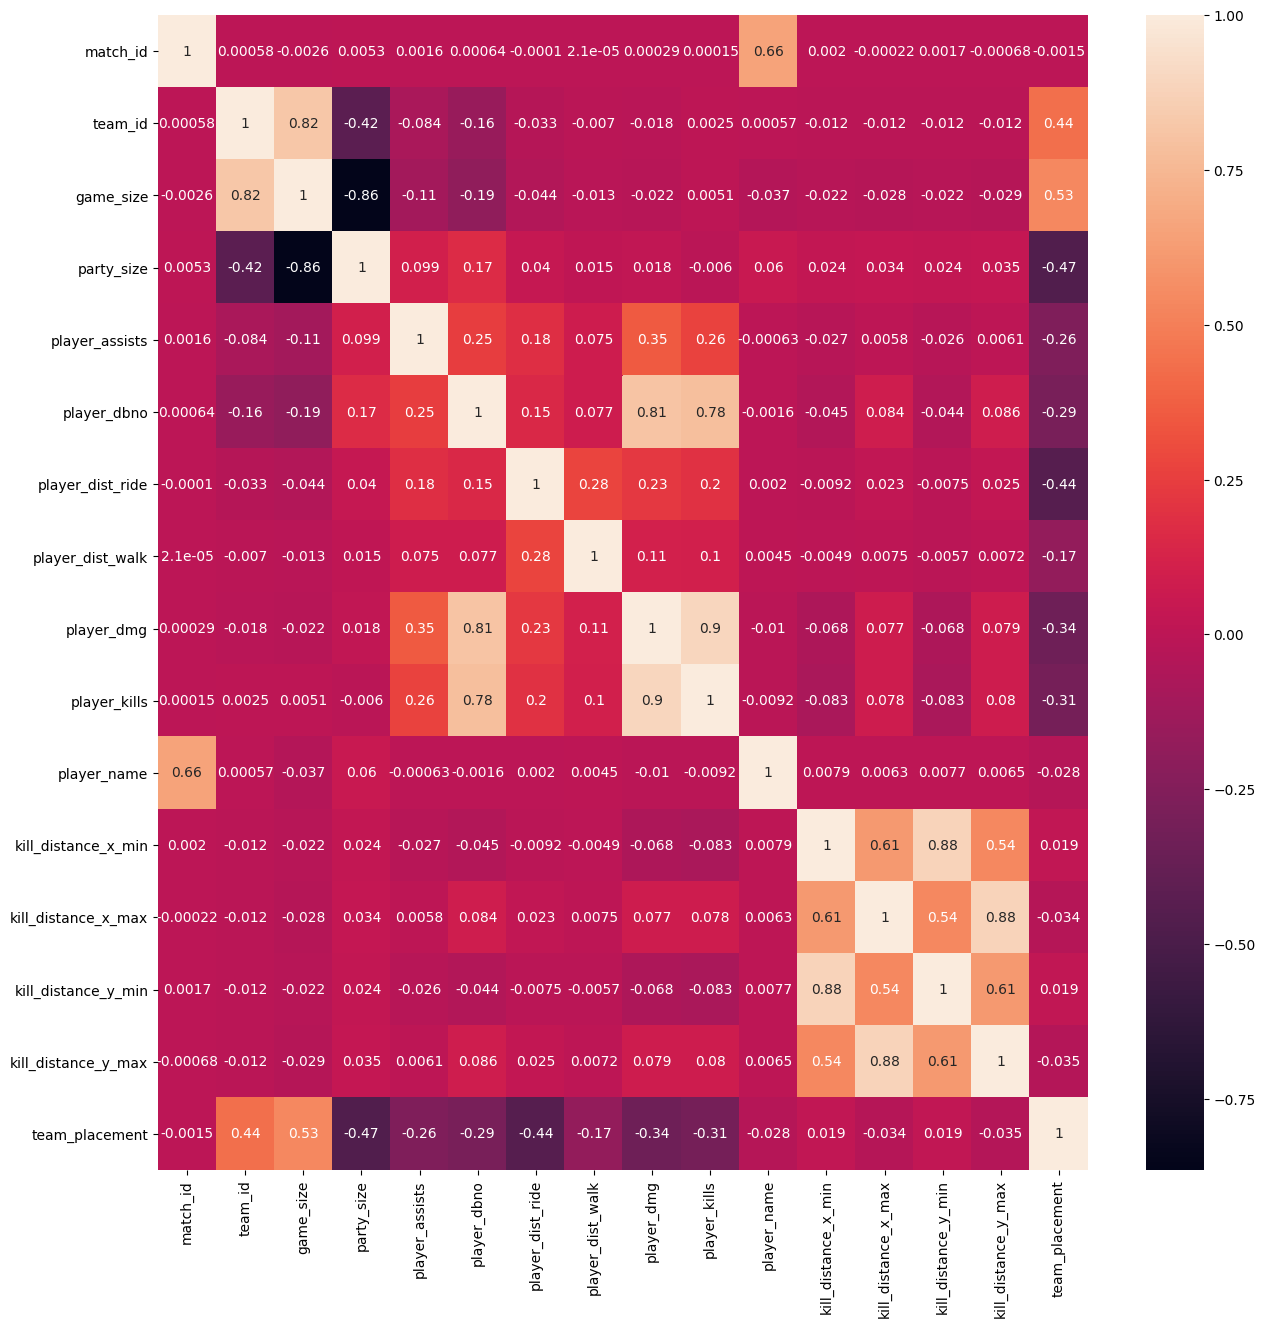

In [6]:
plt.figure(figsize=(15,15))
sns.heatmap(train_df.corr(),annot=True)

In [7]:
print(train_df.columns)

Index(['match_id', 'team_id', 'game_size', 'party_size', 'player_assists',
       'player_dbno', 'player_dist_ride', 'player_dist_walk', 'player_dmg',
       'player_kills', 'player_name', 'kill_distance_x_min',
       'kill_distance_x_max', 'kill_distance_y_min', 'kill_distance_y_max',
       'team_placement'],
      dtype='object')


In [8]:
# train_df['kii_distans']=train_df['kill_distance_x_max']-train_df['kill_distance_x_min']+train_df['kill_distance_y_max']-train_df['kill_distance_y_min']
train_df = train_df.drop(['team_id','match_id','player_name','kill_distance_x_min','kill_distance_x_max','kill_distance_y_max','kill_distance_y_min'], axis=1)
test_df = test_df.drop(['team_id','match_id','player_name','kill_distance_x_min','kill_distance_x_max','kill_distance_y_max','kill_distance_y_min'], axis=1)

train_df = train_df.fillna(0)
test_df = test_df.fillna(0)
train_df.shape, test_df.shape

((1500000, 9), (500000, 8))

In [9]:
print(train_df.columns)

Index(['game_size', 'party_size', 'player_assists', 'player_dbno',
       'player_dist_ride', 'player_dist_walk', 'player_dmg', 'player_kills',
       'team_placement'],
      dtype='object')


In [10]:

# # 标签归一化，按照本场比赛的队伍数量进行处理
# # train_df['team_placement'] /= train_df['game_size'] 

# 数值归一化
for col in train_df.columns[:-1]:
    train_df[col] /= train_df[col].max()
    test_df[col] /= test_df[col].max()

### **传统机器学习算法尝试**

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:

seed = 10086
# x_train, x_test, y_train, y_test = train_test_split(train_data, train_label, test_size=0.1, random_state=seed)
training_data = train_df.iloc[:-15000].values.astype(np.float32)
val_data = train_df.iloc[-15000:].values.astype(np.float32)

In [13]:

#n_estimators参数调优
loss_list = []
for i in range(10, 500, 10):
    # use gpu
    model = xgb.XGBRegressor(n_estimators=i, random_state=seed, tree_method='gpu_hist')

    model.fit(training_data[:, :-1], training_data[:, -1:])
    val_pred = model.predict(val_data[:, :-1])
    loss = mean_absolute_error(val_data[:, -1:], val_pred)
    
    # loss = cross_val_score(model, val[:, :-1], val[:, -1:], cv=10, scoring='neg_mean_absolute_error').mean()
    loss_list.append(loss)
    print(i, loss)

10 4.8811793
20 4.712947
30 4.704374
40 4.7016563
50 4.700135
60 4.699593
70 4.6990376
80 4.698992
90 4.6988826
100 4.6981983
110 4.696897
120 4.696716
130 4.697345
140 4.697956
150 4.6974816
160 4.6979246


KeyboardInterrupt: 

In [ ]:
print(min(loss_list))
#50  4.6995854

In [ ]:
#max_depth参数调优
loss_list = []
for i in range(3, 13):
    # use gpu
    model = xgb.XGBRegressor(n_estimators=50, random_state=seed, tree_method='gpu_hist', max_depth=i)
    model.fit(training_data[:, :-1], training_data[:, -1:])
    
    val_pred = model.predict(val_data[:, :-1])
    loss = mean_absolute_error(val_data[:, -1:], val_pred)
    loss_list.append(loss)
    print(i, loss)

In [ ]:
print(min(loss_list))
#运行耗时: 4毫秒
# 4.6995854 6

In [ ]:
#learning_rate参数调优
loss_list = []
for i in range(0,10):
    # use gpu
    model = xgb.XGBRegressor(n_estimators=50, random_state=seed, tree_method='gpu_hist', 
    max_depth=7,
    learning_rate=i/10.0
    )
    model.fit(training_data[:, :-1], training_data[:, -1:])
    
    val_pred = model.predict(val_data[:, :-1])
    loss = mean_absolute_error(val_data[:, -1:], val_pred)
    loss_list.append(loss)
    print(i/10.0, loss)

In [ ]:
#learning_rate 0.3

In [ ]:
model = xgb.XGBRegressor(n_estimators=50, random_state=seed, tree_method='gpu_hist', max_depth=7,learning_rate=0.3)
model.fit(training_data[:, :-1], training_data[:, -1:])
val_pred = model.predict(val_data[:, :-1])
loss = mean_absolute_error(val_data[:, -1:], val_pred)

生成提交结果

In [ ]:
# test_data = paddle.to_tensor(test_df.values.astype(np.float32))
test_data=test_df.values.astype(np.float32)
test_predict = model.predict(test_data)
test_predict = test_predict.round().astype(int)

In [ ]:
pd.DataFrame({
    'team_placement': test_predict
}).to_csv('submission_XGB.csv', index=None)

!zip submission_XGB.zip submission.csv

In [ ]:
#传统机器学习，尝试过随机森林，xgb，lgb，效果不好.使用ANN

### ANN模型搭建

In [11]:
class Regressor(paddle.nn.Layer):#模型结构简单,隐藏层20,10，ReLU激活函数
    def __init__(self):
        super(Regressor, self).__init__()
        self.fc1 = paddle.nn.Linear(in_features=8, out_features=64)
        self.fc2 = paddle.nn.Linear(in_features=64, out_features=128)
        self.fc3 = paddle.nn.Linear(in_features=128, out_features=256)
        self.fc4 = paddle.nn.Linear(in_features=256, out_features=512)
        self.fc5 = paddle.nn.Linear(in_features=512, out_features=1024)
        self.fc6 = paddle.nn.Linear(in_features=1024, out_features=1024)
        self.fc7 = paddle.nn.Linear(in_features=1024, out_features=2048)
        self.fc8 = paddle.nn.Linear(in_features=2048, out_features=1024)
        self.fc9 = paddle.nn.Linear(in_features=1024, out_features=512)
        self.fc10 = paddle.nn.Linear(in_features=512, out_features=256)
        self.fc11 = paddle.nn.Linear(in_features=256, out_features=128)
        self.fc12 = paddle.nn.Linear(in_features=128, out_features=64)
        self.fc13 = paddle.nn.Linear(in_features=64, out_features=32)
        self.fc14 = paddle.nn.Linear(in_features=32, out_features=8)
        self.fc15 = paddle.nn.Linear(in_features=8, out_features=1)

        self.act = paddle.nn.ReLU()
    
    # 网络的前向计算
    def forward(self, inputs):
        x = self.act(self.fc1(inputs))
        x = self.act(self.fc2(x))
        x = self.act(self.fc3(x))
        x = self.act(self.fc4(x))
        x = self.act(self.fc5(x))
        x = self.act(self.fc6(x))
        x = self.act(self.fc7(x))
        x = self.act(self.fc8(x))
        x = self.act(self.fc9(x))
        x = self.act(self.fc10(x))
        x = self.act(self.fc11(x))
        x = self.act(self.fc12(x))
        x = self.act(self.fc13(x))
        x = self.act(self.fc14(x))
        x = self.fc15(x)#最后一层不经过relu，直接输出

        return x

In [12]:
device=paddle.device.set_device('GPU')#在GPU上运行


model = Regressor()
model.to(device)
# 训练模式
model.train()
opt = paddle.optimizer.SGD(learning_rate=0.01, parameters=model.parameters())#使用随机梯度下降SGD
Cri = paddle.nn.L1Loss()#L1loss评估


W1013 19:04:13.767153   184 device_context.cc:447] Please NOTE: device: 0, GPU Compute Capability: 7.0, Driver API Version: 11.2, Runtime API Version: 10.1
W1013 19:04:13.772917   184 device_context.cc:465] device: 0, cuDNN Version: 7.6.


### 模型训练

In [ ]:
EPOCH_NUM = 200 
BATCH_SIZE = 1024  # 设置batch大小
training_data = train_df.iloc[:-10000].values.astype(np.float32)
val_data = train_df.iloc[-10000:].values.astype(np.float32)

for epoch_id in range(EPOCH_NUM):
    np.random.shuffle(training_data)
    
    mini_batches = [training_data[k:k+BATCH_SIZE] for k in range(0, len(training_data), BATCH_SIZE)]
    
    train_loss = []
    for iter_id, mini_batch in enumerate(mini_batches):
        opt.clear_grad()

        x = np.array(mini_batch[:, :-1])
        y = np.array(mini_batch[:, -1:])
        # print('y',y)
        
        features = paddle.to_tensor(x)

        y = paddle.to_tensor(y)
        
        # 前向计算
        predicts = model(features)
        
        loss = Cri(predicts, y)
        avg_loss = paddle.mean(loss)
        train_loss.append(avg_loss.numpy())
        
        # 反向传播
        avg_loss.backward()

        # 更新参数
        opt.step()
    
    mini_batches = [val_data[k:k+BATCH_SIZE] for k in range(0, len(val_data), BATCH_SIZE)]
    val_loss = []
    for iter_id, mini_batch in enumerate(mini_batches):
        x = np.array(mini_batch[:, :-1])
        y = np.array(mini_batch[:, -1:])
        
        features = paddle.to_tensor(x)
        y = paddle.to_tensor(y)

        predicts = model(features)
        loss = Cri(predicts, y)
        avg_loss = paddle.mean(loss)
        val_loss.append(avg_loss.numpy())

    print(f'Epoch {epoch_id}, train MAE {np.mean(train_loss)}, val MAE {np.mean(val_loss)}')

Epoch 0, train MAE 11.492316246032715, val MAE 10.087890625
Epoch 1, train MAE 10.24500846862793, val MAE 9.841543197631836
Epoch 2, train MAE 9.990413665771484, val MAE 10.85286808013916


### 模型预测

In [ ]:
model.eval()
test_data = paddle.to_tensor(test_df.values.astype(np.float32))
test_predict = model(test_data)
test_predict = test_predict.numpy().flatten()
test_predict = test_predict.round().astype(int)

In [ ]:
pd.DataFrame({
    'team_placement': test_predict
}).to_csv('submission.csv', index=None)

!zip submission.zip submission.csv